In [105]:
import scipy.io as sio
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
import scipy
import pandas as pd
import scipy.stats as stats
import scipy.sparse as sparse
import copy
import time
import warnings 
from scipy import integrate
import seaborn as sns
from numpy import sqrt, cosh, tanh, pi, exp
warnings.simplefilter('ignore')

import scipy.io as sio
import os
from tqdm.auto import tqdm

# using functions from PyalData
from pyaldata import *

## Get the data and convert to pandas df

In [91]:
'''
Insert path and filename 
'''

path = '/Users/Daphne/Data/'  
fname = 'Chewie_CO_VR_2016-10-06.mat' 
mat = scipy.io.loadmat(path + fname) 

In [92]:
mat.keys()

dict_keys(['__header__', '__version__', '__globals__', 'trial_data'])

In [93]:
mat['__header__']

b'MATLAB 5.0 MAT-file, Platform: PCWIN64, Created on: Sat Mar 11 17:00:03 2017'

In [94]:
mat['__globals__']

[]

In [95]:
mat['__version__']

'1.0'

In [96]:
df.shape # num trials x info

(774, 24)

In [97]:
'''
Convert matlab file to df
'''
df = mat2dataframe(path+fname, shift_idx_fields=True)

In [98]:
df.head(10)

,monkey,date,task,target_direction,trial_id,result,bin_size,perturbation,perturbation_info,epoch,...,idx_peak_speed,idx_trial_end,pos,vel,acc,force,M1_spikes,M1_unit_guide,PMd_spikes,PMd_unit_guide
0,Chewie,10-06-2016,CO,-2.356194,1,R,0.01,VR,-0.52,BL,...,363,436,"[[-5.399950889827338, -25.11058978269873], [-5...","[[4.615264447089089, -3.6781866137904946], [4....","[[34.913180411358354, -17.92603186704403], [13...","[[0.3854857746577438, -0.18448026169727955], [...","[[0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0,...","[[5, 1], [5, 2], [5, 3], [5, 4], [9, 1], [9, 2...","[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","[[1, 1], [1, 2], [2, 1], [2, 2], [3, 1], [3, 2..."
1,Chewie,10-06-2016,CO,1.570796,2,R,0.01,VR,-0.52,BL,...,356,447,"[[-5.194667657852522, -35.190944353130526], [-...","[[2.3921738136280783, 2.833707639241631], [2.7...","[[31.99226756476989, 80.42711312188004], [34.1...","[[0.1778157378731141, 0.12542049016429982], [0...","[[0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,...","[[5, 1], [5, 2], [5, 3], [5, 4], [9, 1], [9, 2...","[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","[[1, 1], [1, 2], [2, 1], [2, 2], [3, 1], [3, 2..."
2,Chewie,10-06-2016,CO,0.785398,3,R,0.01,VR,-0.52,BL,...,414,483,"[[0.35267826312911055, -22.923278550949004], [...","[[0.5017102009485903, -3.146994710197926], [0....","[[-7.180978950112355, -35.21789901845524], [3....","[[0.2833417683274762, -0.1285513884878812], [0...","[[0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,...","[[5, 1], [5, 2], [5, 3], [5, 4], [9, 1], [9, 2...","[[0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","[[1, 1], [1, 2], [2, 1], [2, 2], [3, 1], [3, 2..."
3,Chewie,10-06-2016,CO,3.141593,4,R,0.01,VR,-0.52,BL,...,397,458,"[[5.072834875801728, -24.89410841851521], [5.0...","[[-1.3275097541588876, -3.5308863978243985], [...","[[-6.932033881542791, 0.17982626642873387], [-...","[[0.08675043530985374, 0.03658922221440793], [...","[[0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","[[5, 1], [5, 2], [5, 3], [5, 4], [9, 1], [9, 2...","[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","[[1, 1], [1, 2], [2, 1], [2, 2], [3, 1], [3, 2..."
4,Chewie,10-06-2016,CO,-1.570796,5,R,0.01,VR,-0.52,BL,...,301,362,"[[-8.194254800472459, -30.26359832666607], [-8...","[[1.8501123719868446, 0.8394848146862552], [2....","[[48.123169514922175, -9.081942493745938], [58...","[[0.2054977133197953, -0.12485484173352068], [...","[[0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0,...","[[5, 1], [5, 2], [5, 3], [5, 4], [9, 1], [9, 2...","[[1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","[[1, 1], [1, 2], [2, 1], [2, 2], [3, 1], [3, 2..."
5,Chewie,10-06-2016,CO,0.000000,6,R,0.01,VR,-0.52,BL,...,293,355,"[[0.6490206110950361, -37.67241398030942], [0....","[[-3.604784746146349, 4.084355440432306], [-3....","[[-13.50846167593347, 29.28783048618782], [-4....","[[0.12662512102637435, 0.14438368237379834], [...","[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0,...","[[5, 1], [5, 2], [5, 3], [5, 4], [9, 1], [9, 2...","[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","[[1, 1], [1, 2], [2, 1], [2, 2], [3, 1], [3, 2..."
6,Chewie,10-06-2016,CO,-1.570796,7,R,0.01,VR,-0.52,BL,...,337,406,"[[7.507900277392501, -30.171508338138324], [7....","[[-5.097369100121194, 1.2168768032589743], [-5...","[[-9.867216114632248, 26.288101248078682], [-1...","[[0.032519011872878256, 0.08704505916615493], ...","[[1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","[[5, 1], [5, 2], [5, 3], [5, 4], [9, 1], [9, 2...","[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","[[1, 1], [1, 2], [2, 1], [2, 2], [3, 1], [3, 2..."
7,Chewie,10-06-2016,CO,-2.356194,8,R,0.01,VR,-0.52,BL,...,355,421,"[[0.3791881512787576, -37.25947279952951], [0....","[[1.0542131497809266, 6.417143052522142], [1.6...","[[69.22501620731025, 72.21292036948843], [53.0...","[[0.24400648981581252, 0.10555376044820426], [...","[[1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,...","[[5, 1], [5, 2], [5, 3], [5, 4], [9, 1], [9, 2...","[[0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","[

In [104]:
# CO is the only task there is so we can use the 
df['task'].unique()

array(['CO'], dtype=object)

In [100]:
df.columns

Index(['monkey', 'date', 'task', 'target_direction', 'trial_id', 'result',
       'bin_size', 'perturbation', 'perturbation_info', 'epoch',
       'idx_trial_start', 'idx_target_on', 'idx_go_cue', 'idx_movement_on',
       'idx_peak_speed', 'idx_trial_end', 'pos', 'vel', 'acc', 'force',
       'M1_spikes', 'M1_unit_guide', 'PMd_spikes', 'PMd_unit_guide'],
      dtype='object')

In [101]:
df[['idx_target_on', 'idx_go_cue', 'idx_trial_end']]

,idx_target_on,idx_go_cue,idx_trial_end
0,186,288,436
1,199,325,447
2,300,367,483
3,244,344,458
4,126,246,362
...,...,...,...
769,129,249,374
770,177,269,388
771,188,317,396
772,197,305,423


## M1 Spikes

In [111]:
df['M1_spikes']

0      [[0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0,...
1      [[0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,...
2      [[0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,...
3      [[0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...
4      [[0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0,...
                             ...                        
769    [[0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0,...
770    [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...
771    [[1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...
772    [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,...
773    [[0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...
Name: M1_spikes, Length: 774, dtype: object

In [116]:
df['M1_spikes'].shape # trials by spikes 

(774,)

In [115]:
df['M1_spikes'][0]

array([[0, 1, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 1, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 1, 0, ..., 1, 0, 0]], dtype=uint8)

In [119]:
df['M1_spikes'][0].shape # one trail: spike trains by neurons / electrodes ?

(447, 63)

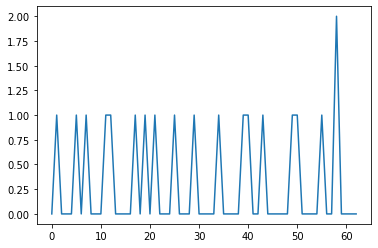

In [126]:
plt.plot(df['M1_spikes'][0][0]);

In [129]:
df['M1_spikes'][0][0].shape

(63,)

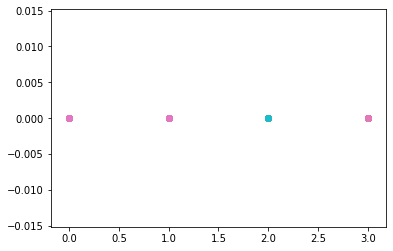

In [134]:
for i, neuron in enumerate(df['M1_spikes'][0]):
    plt.scatter(neuron, y=np.zeros(len(df['M1_spikes'][0][0])))

In [136]:
df['M1_unit_guide']

0      [[5, 1], [5, 2], [5, 3], [5, 4], [9, 1], [9, 2...
1      [[5, 1], [5, 2], [5, 3], [5, 4], [9, 1], [9, 2...
2      [[5, 1], [5, 2], [5, 3], [5, 4], [9, 1], [9, 2...
3      [[5, 1], [5, 2], [5, 3], [5, 4], [9, 1], [9, 2...
4      [[5, 1], [5, 2], [5, 3], [5, 4], [9, 1], [9, 2...
                             ...                        
769    [[5, 1], [5, 2], [5, 3], [5, 4], [9, 1], [9, 2...
770    [[5, 1], [5, 2], [5, 3], [5, 4], [9, 1], [9, 2...
771    [[5, 1], [5, 2], [5, 3], [5, 4], [9, 1], [9, 2...
772    [[5, 1], [5, 2], [5, 3], [5, 4], [9, 1], [9, 2...
773    [[5, 1], [5, 2], [5, 3], [5, 4], [9, 1], [9, 2...
Name: M1_unit_guide, Length: 774, dtype: object

In [138]:
df['M1_unit_guide'][0].shape

(63, 2)

In [139]:
df['M1_unit_guide'][0]

array([[ 5,  1],
       [ 5,  2],
       [ 5,  3],
       [ 5,  4],
       [ 9,  1],
       [ 9,  2],
       [ 9,  3],
       [10,  1],
       [13,  1],
       [13,  2],
       [13,  3],
       [13,  4],
       [15,  1],
       [16,  1],
       [18,  1],
       [20,  1],
       [20,  2],
       [24,  1],
       [24,  2],
       [24,  3],
       [26,  1],
       [28,  1],
       [28,  2],
       [28,  3],
       [32,  1],
       [32,  2],
       [32,  3],
       [34,  1],
       [36,  1],
       [40,  1],
       [40,  2],
       [42,  1],
       [43,  1],
       [44,  1],
       [46,  1],
       [46,  2],
       [46,  3],
       [46,  4],
       [47,  1],
       [50,  1],
       [50,  2],
       [51,  1],
       [52,  1],
       [53,  1],
       [53,  2],
       [54,  1],
       [54,  2],
       [54,  3],
       [54,  4],
       [56,  1],
       [62,  1],
       [62,  2],
       [65,  1],
       [75,  1],
       [79,  1],
       [86,  1],
       [91,  1],
       [91,  2],
       [92,  1